## Preambule

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

## Read data

In [2]:
xr_dataread = xr.open_dataset("K:/ECEMF/T5.2/xr_dataread.nc")
xr_nld_raw = xr.open_dataset("K:/ECEMF/T5.2/Allocations/xr_alloc_NLD.nc")

In [3]:
rules = ['GF', 'PCC', 'PC', 'AP', 'ECPC', 'GDR']
#rulecolors = np.array([(121, 125, 28), 'forestgreen', 'goldenrod', 'mediumvioletred', 'tomato', 'steelblue'])/256
rulecolors = np.array([(90, 51, 36), (141, 145, 31), (0, 156, 223), (157, 0, 100), (230, 173, 31), (61, 29, 92), ])/256
rulenames = ['Grandfathering', 'Per capita convergence', 'Immediate per capita', 'Ability to pay', "Equal cumulative\nper capita", 'Greenhouse Development\nRights']

In [4]:
emis_1990 = xr_dataread.GHG_hist.sel(Region='NLD', Time=1990)

## Plot

In [5]:
dt = 0.5
xr_nld_post = xr_nld_raw.sel(Time=np.arange(2040, 2101))
xr_nld = xr_nld_raw.sel(Time=np.arange(2021, 2041))

In [15]:
temp=2.0
risk=0.67
basic_settings = {'Temperature': temp, 'Risk': risk, 'NegEmis': 0.5, 'NonCO2red': 0.5, 'Scenario':'SSP2', 'Convergence_year':2050}

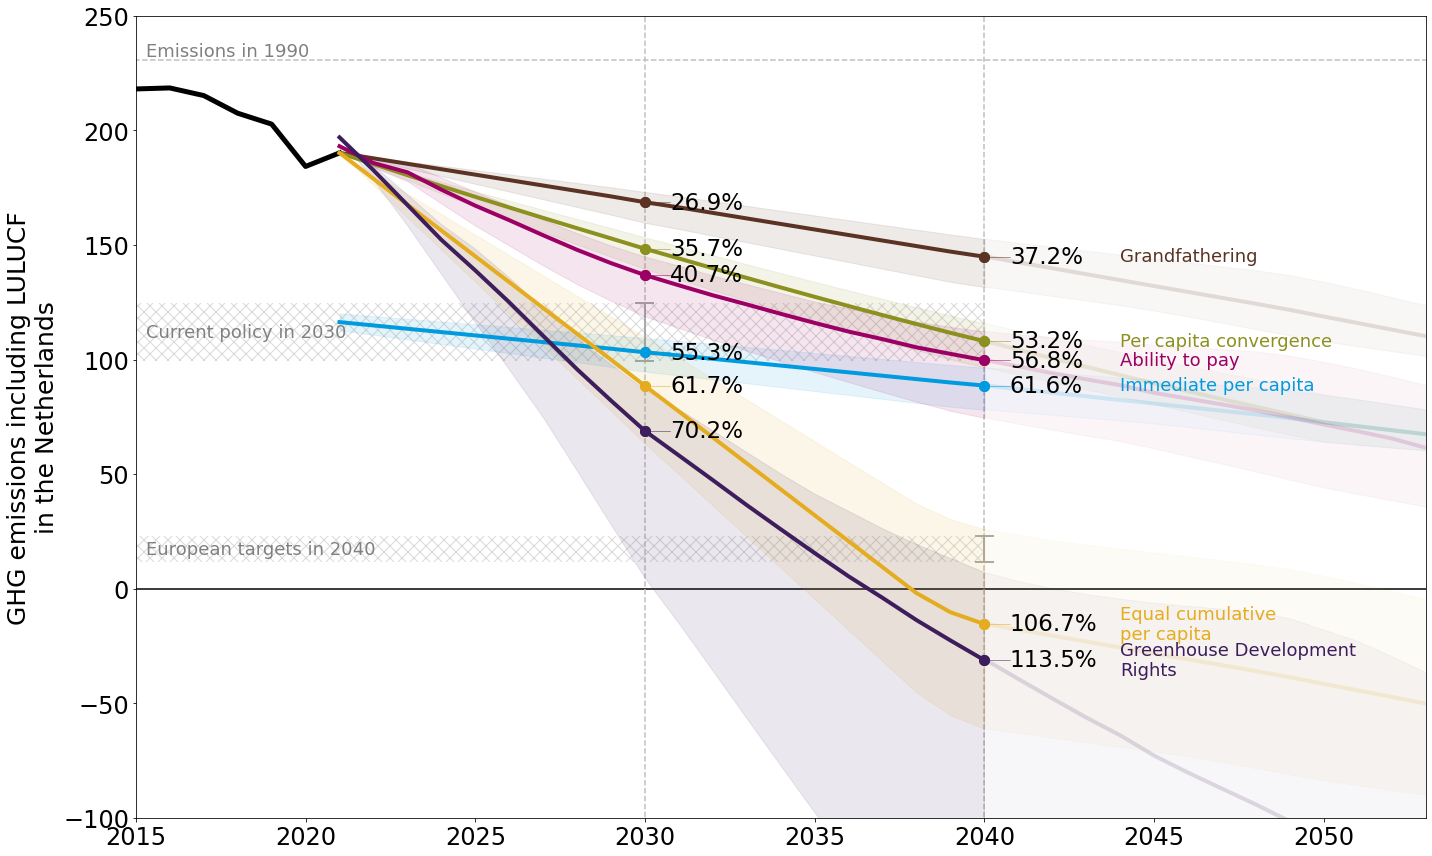

In [24]:
fig, ax = plt.subplots(figsize=(20, 12), facecolor='w')
ax.set_xlim([2015, 2053])
if temp == 1.5: ax.set_ylim([-400, 250])
if temp == 2.0: ax.set_ylim([-100, 250])

ax.plot(xr_dataread.Time, xr_dataread.GHG_hist.sel(Region='NLD'), lw=5, c='k', label='Historical emissions')
ax.plot([1990, 1e5], [xr_dataread.GHG_hist.sel(Region='NLD', Time=1990), xr_dataread.GHG_hist.sel(Region='NLD', Time=1990)], '--', c='silver', zorder=-1e9)

for rule_i, rule in enumerate(rules):
    dat = xr_nld.sel(**basic_settings, Timing='Immediate')[rule]
    ax.plot(xr_nld.Time, dat, lw=4, c=rulecolors[rule_i])
    ax.plot(xr_nld_post.Time, xr_nld_post.sel(**basic_settings)[rule].mean(dim='Timing'), lw=4, c=rulecolors[rule_i], alpha=0.15)
    y1 = xr_nld.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).max(dim=['Scenario', 'NonCO2red', 'NegEmis'], skipna=False)[rule]
    y2 = xr_nld.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).min(dim=['Scenario', 'NonCO2red', 'NegEmis'], skipna=False)[rule]
    ax.fill_between(xr_nld.Time, y1, y2, where=y1>=y2, color=rulecolors[rule_i], alpha=0.10)
    y1 = xr_nld_post.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).max(dim=['Scenario', 'NonCO2red', 'NegEmis'], skipna=False)[rule]
    y2 = xr_nld_post.sel({'Temperature': temp, 'Risk': risk, 'Convergence_year':2050, 'Timing': 'Immediate'}).min(dim=['Scenario', 'NonCO2red', 'NegEmis'], skipna=False)[rule]
    ax.fill_between(xr_nld_post.Time, y1, y2, where=y1>=y2, color=rulecolors[rule_i], alpha=0.04)
    bbox = dict(boxstyle="round", fc='white', ec=rulecolors[rule_i])
    for year_i, year in enumerate([2030, 2040]):
        val = dat.sel(Time=year)
        if temp == 1.5: val_plot = val+[[40, 18, 12, -22, -32, 0][rule_i], [40, 17, -15, -15, 0, 0][rule_i]][year_i]
        if temp == 2.0: val_plot = val+[[0, 0, 0, 0, 0, 0][rule_i], [0, 0, 0, 0, 0, 0][rule_i]][year_i]
        if year == 2030: ax.plot([year, year], [val, val], 'o', lw=5, ms=10, label=rulenames[rule_i], c=rulecolors[rule_i])
        else: ax.plot([year, year], [val, val], 'o', lw=5, ms=10, c=rulecolors[rule_i])
        ax.text(year+dt*3, val_plot, str(np.round(-float((val-emis_1990)/emis_1990)*100,1))+'%', fontsize=23, va='center', ha='left') #bbox=bbox, 
        ax.plot([year+dt*3, year], [val_plot, val], lw=0.5, c=rulecolors[rule_i])
        if year == 2040: ax.text(year+4, val_plot, rulenames[rule_i], fontsize=18, va='center', ha='left', c=rulecolors[rule_i])

# Policy stuff
x = np.linspace(-1e3, 2040, 10)
y1 = np.array([emis_1990*(1-0.46)]*len(x))
y2 = np.array([emis_1990*(1-0.57)]*len(x))
ax.fill_between(x, y1, y2, where=y1>=y2, alpha=0.15, zorder=-1e9, color="none", hatch="xx", edgecolor="k", lw=0)
y1 = np.array([emis_1990*(1-0.90)]*len(x))
y2 = np.array([emis_1990*(1-0.95)]*len(x))
ax.fill_between(x, y1, y2, where=y1>=y2, alpha=0.15, zorder=-1e9, color="none", hatch="xx", edgecolor="k", lw=0)

ax.plot([-1e3, 1e5], [0, 0], 'k', zorder=-1e9)
ax.plot([2030, 2030], [-1e3, 1e3], '--', c='silver', zorder=-1e9)
ax.plot([2040, 2040], [-1e3, 1e3], '--', c='silver', zorder=-1e9)

dt=0.25
ax.plot([2030, 2030], [emis_1990*(1-0.57), emis_1990*(1-0.46)], 'darkgrey', lw=2, zorder=-1)
ax.plot([2030-dt, 2030+dt], [emis_1990*(1-0.46), emis_1990*(1-0.46)], 'darkgrey', lw=2, zorder=-1)
ax.plot([2030-dt, 2030+dt], [emis_1990*(1-0.57), emis_1990*(1-0.57)], 'darkgrey', lw=2, zorder=-1)
#ax.plot([2030, 2030], [emis_1990*(1-0.57), emis_1990*(1-0.46)], 'ks', ms=10)

ax.plot([2040, 2040], [emis_1990*(1-0.90), emis_1990*(1-0.95)], 'darkgrey', lw=2, zorder=-1)
ax.plot([2040-dt, 2040+dt], [emis_1990*(1-0.90), emis_1990*(1-0.90)], 'darkgrey', lw=2, zorder=-1)
ax.plot([2040-dt, 2040+dt], [emis_1990*(1-0.95), emis_1990*(1-0.95)], 'darkgrey', lw=2, zorder=-1)
#ax.plot([2040, 2040], [emis_1990*(1-0.90), emis_1990*(1-0.95)], 'ks', ms=10)

ax.text(2015.3, emis_1990, 'Emissions in 1990', color='grey', va='bottom', ha='left', fontsize=18)
ax.text(2015.3, emis_1990*(1-np.mean([0.46, 0.57])), 'Current policy in 2030', color='grey', va='center', ha='left', fontsize=18)
ax.text(2015.3, emis_1990*(1-np.mean([0.90, 0.95])), 'European targets in 2040', color='grey', va='center', ha='left', fontsize=18)

#plt.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
ax.set_ylabel('GHG emissions including LULUCF\nin the Netherlands', fontsize=25)
fig.tight_layout()
plt.savefig("X:/user/dekkerm/Projects/ECEMF_T5.2/Figures/PBL_report/Fig_NLD_"+str(temp)[0]+".png", dpi=250)

## Save